In [350]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.datasets import load_breast_cancer

## STEP 1: LOADING DEL DATASET

In [351]:
cancer = load_breast_cancer()

In [352]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = pd.Series(cancer.target)

In [353]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [355]:
df.isna().any()

mean radius                False
mean texture               False
mean perimeter             False
mean area                  False
mean smoothness            False
mean compactness           False
mean concavity             False
mean concave points        False
mean symmetry              False
mean fractal dimension     False
radius error               False
texture error              False
perimeter error            False
area error                 False
smoothness error           False
compactness error          False
concavity error            False
concave points error       False
symmetry error             False
fractal dimension error    False
worst radius               False
worst texture              False
worst perimeter            False
worst area                 False
worst smoothness           False
worst compactness          False
worst concavity            False
worst concave points       False
worst symmetry             False
worst fractal dimension    False
target    

In [356]:
#df = df.dropna(axis='columns')

In [357]:
df.target.value_counts()

1    357
0    212
Name: target, dtype: int64

In [358]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline
sns.set_style('darkgrid')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



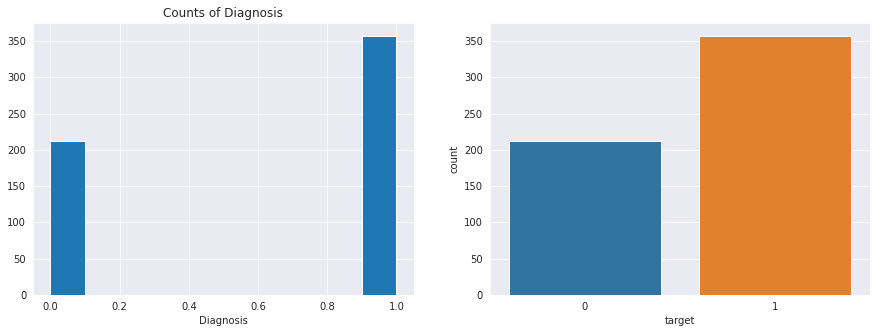

In [359]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(df.target)
plt.title("Counts of Diagnosis")
plt.xlabel("Diagnosis")


plt.subplot(1, 2, 2)

sns.countplot('target', data=df);

plt.show() 

In [360]:
cols = df.columns
print(len(cols))
df[cols].corr()

31


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


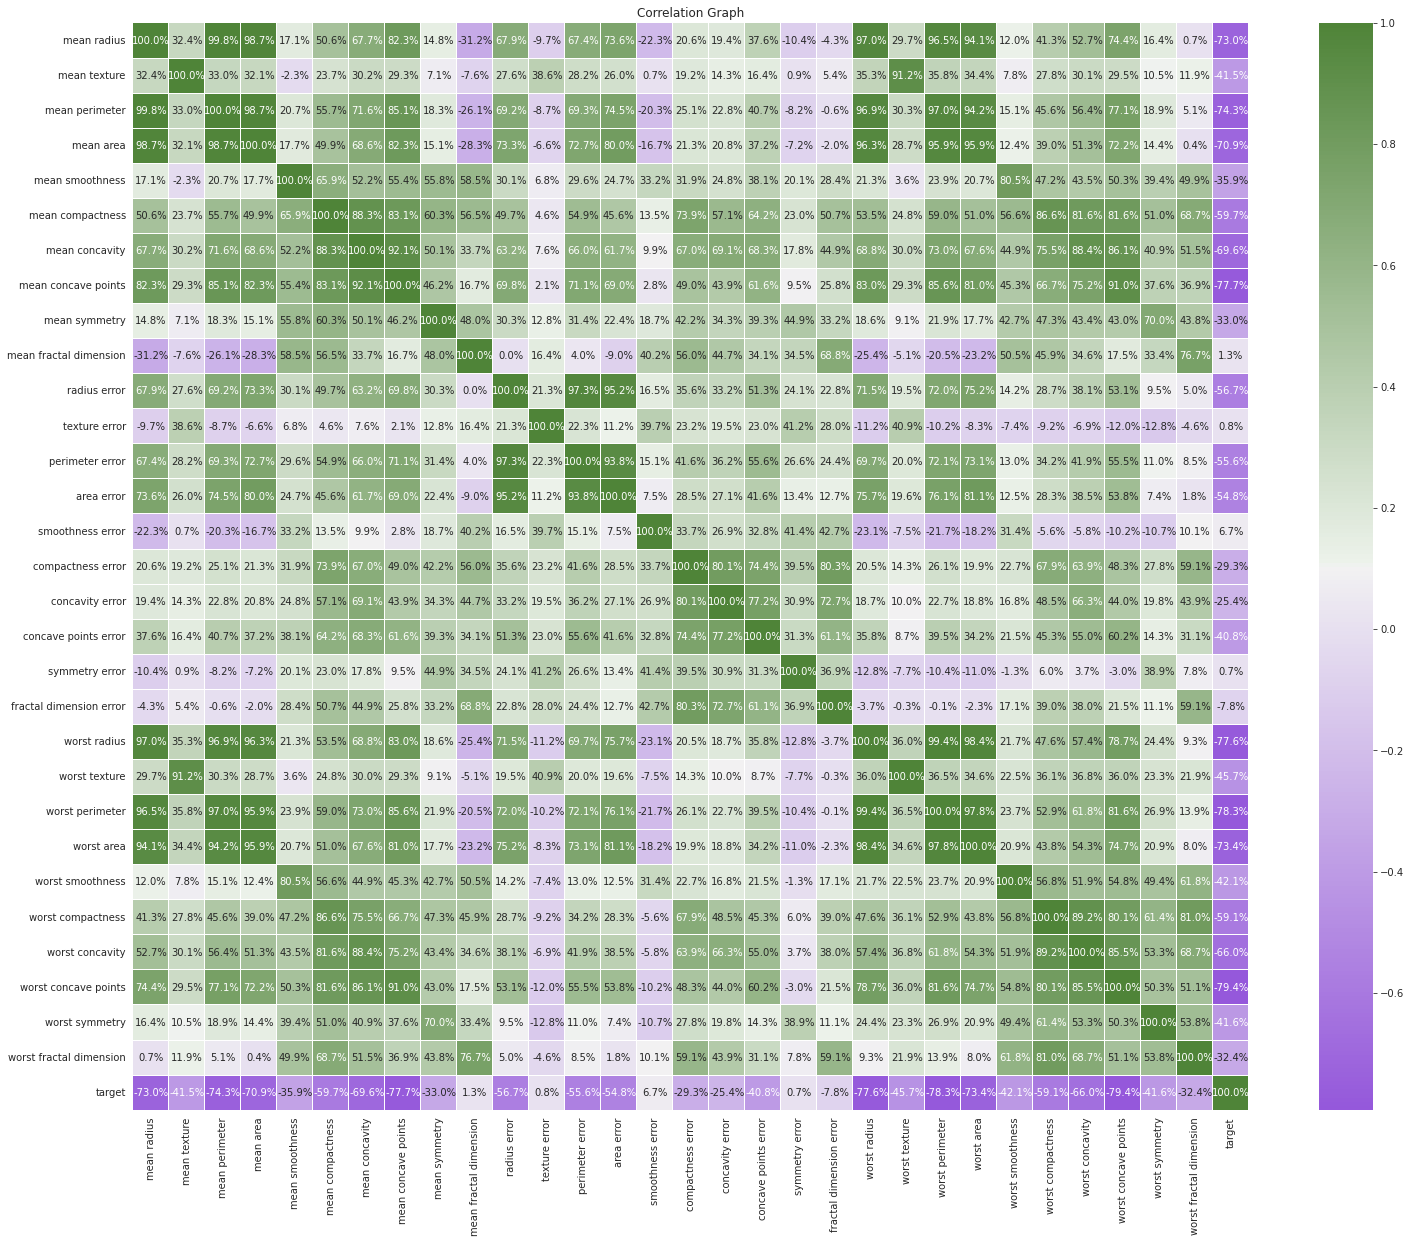

In [361]:
plt.figure(figsize=(25, 20))

plt.title("Correlation Graph")

cmap = sns.diverging_palette( 1000, 120, as_cmap=True)
sns.heatmap(df[cols].corr(), annot=True, fmt='.1%',  linewidths=.05, cmap=cmap);

In [362]:
plt.figure(figsize=(15, 10))
fig = px.imshow(df[cols].corr());
fig.show()

<Figure size 1080x720 with 0 Axes>

In [363]:
samples = []
without = []
for c in df.columns:
  if c.find("mean") == -1:
    without.append(c)
  
  else:
    samples.append(c)
samples.append('target')

In [364]:
print(len(samples))
df[samples].corr()

11


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.012838


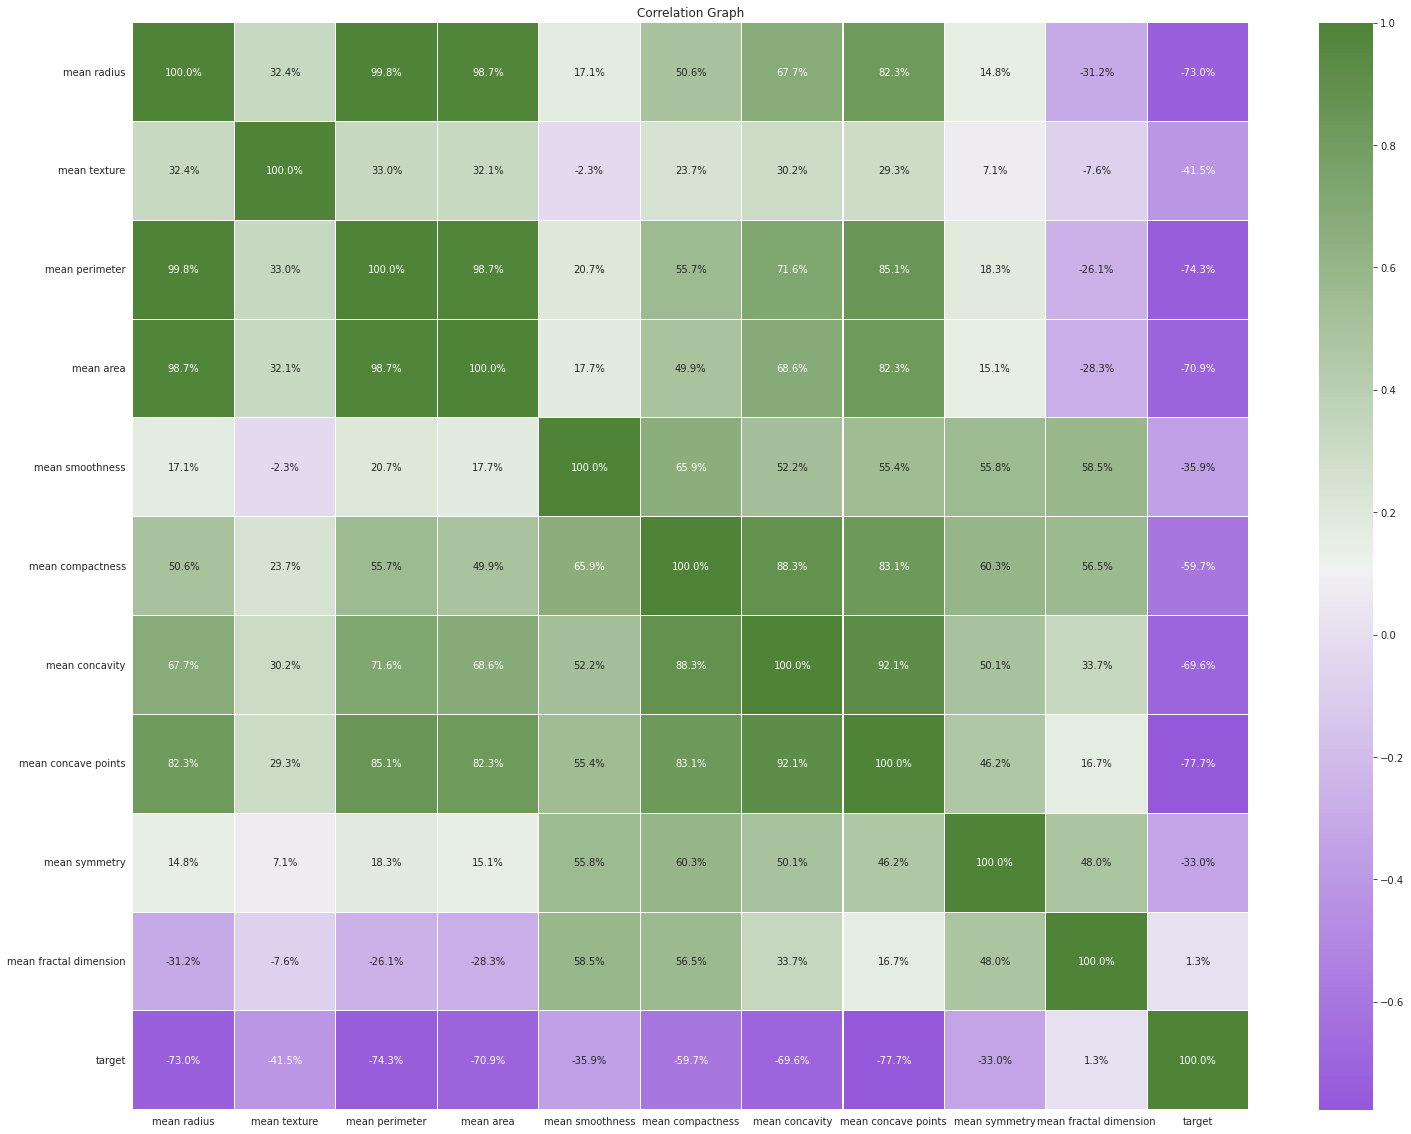

In [365]:
plt.figure(figsize=(25, 20))

plt.title("Correlation Graph")

cmap = sns.diverging_palette( 1000, 120, as_cmap=True)
sns.heatmap(df[samples].corr(), annot=True, fmt='.1%',  linewidths=.05, cmap=cmap);

## STEP 2 : METODI PREDITTIVI

In [366]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [367]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [368]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn import metrics

In [369]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [370]:
target_feature = 'target'
y = df[target_feature]
X = df.drop('target',axis = 1)

In [371]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=15)

In [372]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [373]:
def model_building(model, X_train, X_test, y_train, y_test):
    
    model.fit(X_train, y_train)
    score = model.score(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(predictions, y_test)
    
    return (score, accuracy, predictions)   

In [374]:
models_list = {
    "KNeighborsClassifier" :  KNeighborsClassifier(n_neighbors = 5),
    "RandomForestClassifier" :  RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=5),
    "SVC" :  SVC(),
}

In [375]:
#print(list(models_list.keys()))
#print(list(models_list.values()))

In [376]:
def confusion_matrix_graph(cm):
    
    sns.heatmap(cm,annot=True,fmt="d")
    plt.show()

In [377]:
df_prediction = []
confusion_matrixs = []
df_prediction_cols = [ 'model_name', 'score', 'accuracy_score' , "accuracy_percentage"]

for name, model in zip(list(models_list.keys()), list(models_list.values())):
    
    (score, accuracy, predictions) = model_building(model, X_train, X_test, y_train, y_test )
    
    print("\n\nClassification Report of '"+ str(name), "'\n")
    
    print(classification_report(y_test, predictions))

    df_prediction.append([name, score, accuracy, "{0:.2%}".format(accuracy)])
    
    # For Showing Metrics
    confusion_matrixs.append(confusion_matrix(y_test, predictions))
    
        
df_pred = pd.DataFrame(df_prediction, columns=df_prediction_cols)



Classification Report of 'KNeighborsClassifier '

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        73
           1       0.95      1.00      0.97       115

    accuracy                           0.97       188
   macro avg       0.98      0.96      0.97       188
weighted avg       0.97      0.97      0.97       188



Classification Report of 'RandomForestClassifier '

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        73
           1       0.94      0.98      0.96       115

    accuracy                           0.95       188
   macro avg       0.96      0.94      0.95       188
weighted avg       0.95      0.95      0.95       188



Classification Report of 'SVC '

              precision    recall  f1-score   support

           0       0.99      0.93      0.96        73
           1       0.96      0.99      0.97       115

    accuracy                           0.

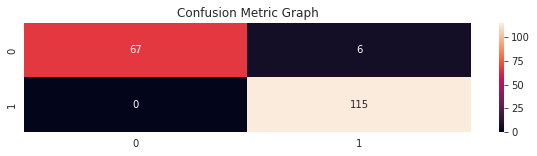

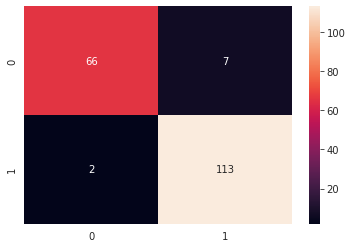

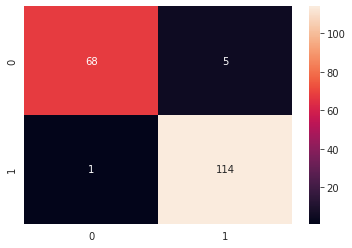

<Figure size 432x288 with 0 Axes>

In [378]:
plt.figure(figsize=(10, 2))
plt.title("Confusion Metric Graph")


for index, cm in enumerate(confusion_matrixs):


  plt.xlabel("Negative Positive")
  plt.ylabel("True Positive")

    
    
    # Show The Metrics Graph    
  confusion_matrix_graph(cm) # Call the Confusion Metrics Graph
  plt.tight_layout(pad=True)

In [379]:
df_pred


,model_name,score,accuracy_score,accuracy_percentage
0,KNeighborsClassifier,0.979003,0.968085,96.81%
1,RandomForestClassifier,0.997375,0.952128,95.21%
2,SVC,0.989501,0.968085,96.81%


In [380]:
df_pred.sort_values('score', ascending=False)

,model_name,score,accuracy_score,accuracy_percentage
1,RandomForestClassifier,0.997375,0.952128,95.21%
2,SVC,0.989501,0.968085,96.81%
0,KNeighborsClassifier,0.979003,0.968085,96.81%


## STEP 3 : NESTED CROSS VALIDATION

In [381]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV

test_score_not_nested = []
test_score_nested = []
param_grid = {"C": [0.1, 1, 10], "gamma": [.01, .1]}
model_to_tune = SVC()
N_TRIALS = 10
for i in range(N_TRIALS):
    
    inner_cv = KFold(n_splits=5, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=3, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    model = GridSearchCV(estimator=model_to_tune, param_grid=param_grid,
                         cv=inner_cv, n_jobs=2)
    model.fit(X, y)
    test_score_not_nested.append(model.best_score_)

    # Nested CV with parameter optimization
    test_score = cross_val_score(model, X, y, cv=outer_cv, n_jobs=2)
    test_score_nested.append(test_score.mean())


In [382]:
all_scores = {
    "Nested CV": test_score_nested,
    "Not nested CV": test_score_not_nested,
}
all_scores = pd.DataFrame(all_scores)

In [383]:
def Average(lst):
    return sum(lst) / len(lst)

<Figure size 1080x576 with 0 Axes>

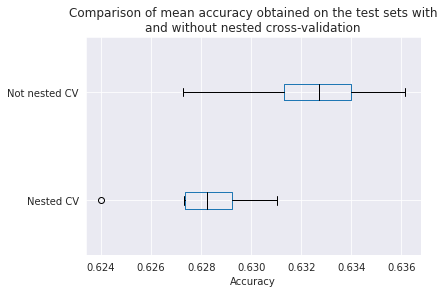

In [384]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,8))
color = {"whiskers": "black", "medians": "black", "caps": "black"}
all_scores.plot.box(color=color, vert=False)
plt.xlabel("Accuracy")
_ = plt.title("Comparison of mean accuracy obtained on the test sets with\n"
              "and without nested cross-validation")
plt.show()

In [385]:
ac1=Average(test_score_nested)

In [386]:
test_score_nested_1 = []
param_grid_1 = {"n_neighbors": [3, 5, 7, 9]}
model_to_tune_1 = KNeighborsClassifier()
N_TRIALS = 10
for i in range(N_TRIALS):
    
    inner_cv = KFold(n_splits=5, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=3, shuffle=True, random_state=i)
    model_1 = GridSearchCV(estimator=model_to_tune_1, param_grid=param_grid_1,
                         cv=inner_cv, n_jobs=2)
    
    test_score_1 = cross_val_score(model_1, X, y, cv=outer_cv, n_jobs=2)
    test_score_nested_1.append(test_score.mean())
ac2=Average(test_score_nested_1)

In [387]:
test_score_nested_2 = []
param_grid_2 = {"n_estimators": [10, 20, 30], "criterion": ['gini', 'entropy']}
model_to_tune_2 = RandomForestClassifier()
N_TRIALS = 10
for i in range(N_TRIALS):
    
    inner_cv = KFold(n_splits=5, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=3, shuffle=True, random_state=i)

    model_2 = GridSearchCV(estimator=model_to_tune_2, param_grid=param_grid_2,
                         cv=inner_cv, n_jobs=2)

    test_score_2 = cross_val_score(model_2, X, y, cv=outer_cv, n_jobs=2)
    test_score_nested_2.append(test_score.mean())
ac3=Average(test_score_nested_2)

## STEP 4 : COMPARISONS

In [388]:
models =[('SVC', ac1),
          ('KNN', ac2),
          ('Random Forest Classificator ', ac3)]
predict = pd.DataFrame(data = models, columns=['Model', 'Test Accuracy'])
predict

,Model,Test Accuracy
0,SVC,0.628290
1,KNN,0.623995
2,Random Forest Classificator,0.623995


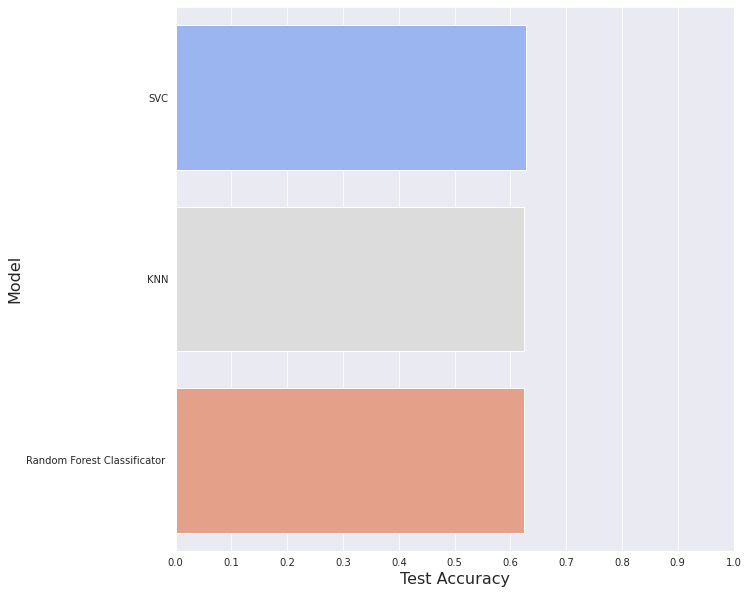

In [389]:
f, ax = plt.subplots(1,1, figsize=(10,10))


predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='coolwarm', ax = ax)
#axes[0].set(xlabel='Region', ylabel='Charges')
ax.set_xlabel('Test Accuracy', size=16)
ax.set_ylabel('Model',size=16)
ax.set_xlim(0,1.0)
ax.set_xticks(np.arange(0, 1.1, 0.1))

plt.show()